In [1]:
import pandas as pd
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [19]:
def default_pars( **kwargs):
    pars = {}
    
    pars['snr']    = 0.08 #Source of resting phagocytes
    pars['unr']    = 0.12 #Decay rate of resting phagocytes
    
    ### simulation parameters ###
    pars['T'] = 100. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars    

In [20]:
def run_phagoctye_model(pars):
    
        # Set parameters
    snr = pars['snr']
    unr = pars['unr']
    
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    NR = np.zeros(Lt) # non-specific local response levels
    NR[0]= 0    
    for it in range(Lt-1):
        dNR = (snr-unr *NR[it] )* dt

        #update
        NR[it+1] = NR[it] + dNR
    return(NR)

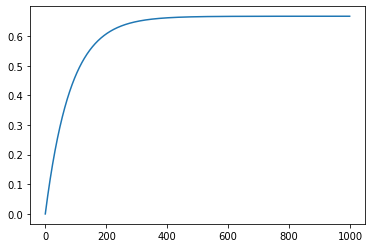

In [21]:
pars = default_pars()
NR =run_phagoctye_model(pars)
plt.plot(NR)

In [15]:
# 0.08/0.12 - steady state